In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
from datetime import datetime

In [2]:
gold = yf.download(tickers = 'GC=F',
                     period = 'max',
                     interval = '1d').reset_index()

gold = gold.rename(columns = {'Open': 'gold_open', 'High': 'gold_high', 'Low': 'gold_low', 'Close': 'gold_close', 'Adj Close': 'gold_adj_close', 'Volume': 'gold_volume'})
gold.head()

[*********************100%%**********************]  1 of 1 completed


,Date,gold_open,gold_high,gold_low,gold_close,gold_adj_close,gold_volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0


In [3]:
uero_usd = yf.download(tickers = 'EURUSD=X' , period = 'max' , interval = '1d').reset_index()
uero_usd = uero_usd.rename(columns = {'Open': 'euro_usd_open' , 'High' : 'euro_usd_high' , 'Low': 'euro_usd_low' , 'Close':'euro_usd_close' , 'Adj Close':'euro_usd_adj_close' , 'Volume': 'euro_usd_volume'})
uero_usd.head()

[*********************100%%**********************]  1 of 1 completed


,Date,euro_usd_open,euro_usd_high,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume
0,2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
1,2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2,2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
3,2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
4,2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0


In [4]:
sp500 = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d").reset_index()
sp500 = sp500.rename(columns={'Open': 'sp500_open', 'High': 'sp500_high', 'Low': 'sp500_low', 'Close': 'sp500_close', 'Adj Close': 'sp500_adj_close', 'Volume': 'sp500_volume'})
sp500.head()

[*********************100%%**********************]  1 of 1 completed


,Date,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [5]:
xmr = yf.Ticker("XMR-USD")
df = yf.download(tickers = 'XMR-USD' ,
                 period = 'max',
                 interval = '1d').reset_index()
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000


In [6]:
df.loc[0 , 'price_increase'] = 0
for i in range(1, len(df)):
  df.loc[i , 'price_increase'] = 1 if df.loc[i-1 , 'Close'] < df.loc[i , 'Close'] else 0
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,price_increase
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0.0
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,0.0
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1.0
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,1.0
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0.0


In [7]:
df = df.merge(gold , on='Date' , how = 'left').merge(uero_usd , on ='Date' , how = 'left').merge(sp500 , on = 'Date' , how = 'left')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,price_increase,gold_open,gold_high,...,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0.0,1279.699951,1286.900024,...,1.158641,1.159689,1.159689,0.0,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3.844100e+09
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,0.0,1283.500000,1283.500000,...,1.162399,1.164687,1.164687,0.0,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.489740e+09
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0.0,1277.300049,1277.300049,...,1.163873,1.166113,1.166113,0.0,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3.405200e+09


<Axes: ylabel='Frequency'>

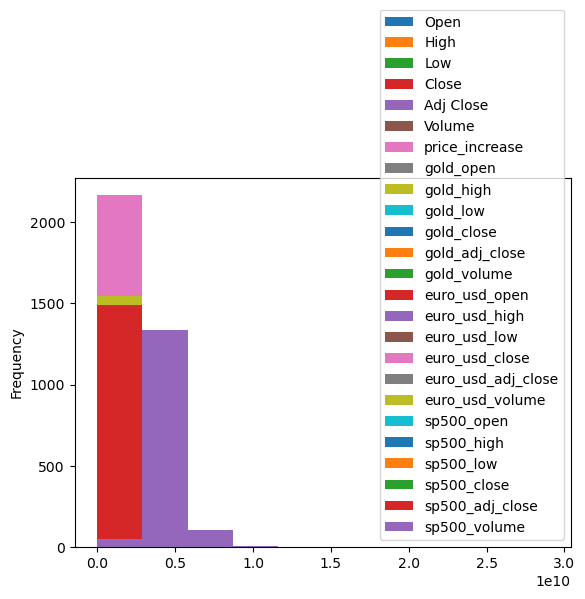

In [8]:
df.plot(kind = 'hist')

In [9]:
!gdown 11NUjXNzuFnBd0MShJYq-RlrFeepMHUrA
!gdown 1WUNRZJgU0f5NaC-6Z0n_mMvt6P9yNV1U

'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
date_parser = lambda x: datetime.strptime(x , "%Y-%m-%dT%H:%M:%SZ").date()\

xmr_hash = pd.read_csv('./XMR_hash.csv' , index_col = 0 , parse_dates = ["time"] , date_parser = date_parser)
xmr_difficulty = pd.read_csv('./XMR_difficulty.csv' , index_col = 0 , parse_dates = ['time'] , date_parser = date_parser)
xmr_hash.head()

,time_stamp,hash,time
0,1.442190e+12,12514082.15,2015-09-14
1,1.442280e+12,13361330.16,2015-09-15
2,1.442360e+12,13065948.13,2015-09-16
3,1.442450e+12,12663854.33,2015-09-17
4,1.442530e+12,12198340.44,2015-09-18


In [11]:
xmr_difficulty.head()

,time_stamp,difficulty,time
0,1442188800000,7.508450e+08,2015-09-14
1,1442275200000,8.016798e+08,2015-09-15
2,1442361600000,7.839569e+08,2015-09-16
3,1442448000000,7.598313e+08,2015-09-17
4,1442534400000,7.319005e+08,2015-09-18


In [12]:
df = xmr_hash.sort_values(by = ['time' , 'time_stamp']).drop_duplicates(subset='time' , keep = 'last').merge(df , left_on = 'time' , right_on = 'Date')
df.head()

,time_stamp,hash,time,Date,Open,High,Low,Close,Adj Close,Volume,...,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
0,1.510190e+12,233898872.2,2017-11-09,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,...,1.158641,1.159689,1.159689,0.0,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3.844100e+09
1,1.510270e+12,233778227.0,2017-11-10,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,...,1.162399,1.164687,1.164687,0.0,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.489740e+09
2,1.510360e+12,233778227.0,2017-11-11,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.510440e+12,233778227.0,2017-11-12,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.510530e+12,233778227.0,2017-11-13,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,...,1.163873,1.166113,1.166113,0.0,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3.405200e+09


In [13]:
df = xmr_difficulty.sort_values(by = ['time' , 'time_stamp']).drop_duplicates(subset = 'time' , keep='last').merge(df , on = 'time')
df.head()

,time_stamp_x,difficulty,time,time_stamp_y,hash,Date,Open,High,Low,Close,...,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
0,1510185600000,2.806786e+10,2017-11-09,1.510190e+12,233898872.2,2017-11-09,112.531998,123.404999,112.219002,120.779999,...,1.158641,1.159689,1.159689,0.0,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3.844100e+09
1,1510272000000,2.805339e+10,2017-11-10,1.510270e+12,233778227.0,2017-11-10,121.344002,121.665001,101.757004,105.585999,...,1.162399,1.164687,1.164687,0.0,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.489740e+09
2,1510358400000,2.805339e+10,2017-11-11,1.510360e+12,233778227.0,2017-11-11,105.750000,127.106003,103.877998,119.615997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1510444800000,2.805339e+10,2017-11-12,1.510440e+12,233778227.0,2017-11-12,119.597000,133.675003,110.617996,123.856003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1510531200000,2.805339e+10,2017-11-13,1.510530e+12,233778227.0,2017-11-13,128.960007,136.528000,120.921997,123.402000,...,1.163873,1.166113,1.166113,0.0,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3.405200e+09


In [14]:
df.isna().sum()

time_stamp_x            0
difficulty              0
time                    0
time_stamp_y            0
hash                    0
Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
price_increase          0
gold_open             672
gold_high             672
gold_low              672
gold_close            672
gold_adj_close        672
gold_volume           672
euro_usd_open         619
euro_usd_high         619
euro_usd_low          619
euro_usd_close        619
euro_usd_adj_close    619
euro_usd_volume       619
sp500_open            671
sp500_high            671
sp500_low             671
sp500_close           671
sp500_adj_close       671
sp500_volume          671
dtype: int64

In [15]:
df.shape

(2151, 31)

In [16]:
df['gold_open'].fillna(0 , inplace = True)

for i in range(len(df)) :
  if df.loc[i , 'gold_open'] == 0 and i != df.shape[0] - 1:
    df.loc[i , 'gold_open'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_high'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_low'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_close'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_adj_close'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_volume'] = df.loc[i-1 , 'gold_volume']
  elif df.loc[i , 'gold_open'] == 0 and i != 0:
    df.loc[i , 'gold_open'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_high'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_low'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_close'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_adj_close'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_volume'] = df.loc[i-1 , 'gold_volume']
  elif df.loc[i , 'gold_open'] == 0 and i == 0:
    df.loc[i , 'gold_open'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_high'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_low'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_close'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_adj_close'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_volume'] = df.loc[i+1 , 'gold_volume']
df.isna().sum()

time_stamp_x            0
difficulty              0
time                    0
time_stamp_y            0
hash                    0
Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
price_increase          0
gold_open               0
gold_high               0
gold_low                0
gold_close              0
gold_adj_close          0
gold_volume             0
euro_usd_open         619
euro_usd_high         619
euro_usd_low          619
euro_usd_close        619
euro_usd_adj_close    619
euro_usd_volume       619
sp500_open            671
sp500_high            671
sp500_low             671
sp500_close           671
sp500_adj_close       671
sp500_volume          671
dtype: int64

In [17]:
df['euro_usd_open'].fillna(0 , inplace = True)
for i in range(len(df)):
  if df.loc[i , 'euro_usd_open'] == 0 and df.shape[0] -1 != i and i != 0:
    df.loc[i , 'euro_usd_open'] = df.loc[i-1 , 'euro_usd_close']
    df.loc[i , 'euro_usd_high'] = df.loc[i-1 , 'euro_usd_close']
    df.loc[i , 'euro_usd_low'] = df.loc[i-1 , 'euro_usd_close']
    df.loc[i , 'euro_usd_close'] = df.loc[i+1 , 'euro_usd_open']
    df.loc[i , 'euro_usd_adj_close'] = df.loc[i+1 , 'euro_usd_open']
    df.loc[i , 'euro_usd_volume'] = df.loc[i-1 ,  'euro_usd_volume']

  elif df.loc[i , 'euro_usd_open'] == 0 and df.shape[0] -1 == i and i != 0:
    df.loc[i , 'euro_usd_open'] = df.loc[i-1, 'euro_usd_close']
    df.loc[i , 'euro_usd_high'] = df.loc[i-1, 'euro_usd_close']
    df.loc[i , 'euro_usd_low']  = df.loc[i-1, 'euro_usd_close']
    df.loc[i , 'euro_usd_close'] = df.loc[i-1, 'euro_usd_close']
    df.loc[i , 'euro_usd_adj_close'] = df.loc[i-1 , 'euro_usd_close']
    df.loc[i , 'euro_usd_volume'] = df.loc[i-1 , 'euro_usd_volume']

  elif df.loc[i , 'euro_usd_open'] == 0 and i == 0:
    df.loc[i , 'euro_usd_open'] = df.loc[i+1 ,'euro_usd_open']
    df.loc[i , 'euro_usd_high'] = df.loc[i+1 ,'euro_usd_open']
    df.loc[i , 'euro_usd_low'] = df.loc[i+1 , 'euro_usd_open']
    df.loc[i , 'euro_usd_close'] = df.loc[i+1 , 'euro_usd_open']
    df.loc[i , 'euro_usd_adj_close'] = df.loc[i+1 , 'euro_usd_open']
    df.loc[i , 'euro_usd_volume'] = df.loc[i+1 , 'euro_usd_volume']
df.isna().sum()

time_stamp_x            0
difficulty              0
time                    0
time_stamp_y            0
hash                    0
Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
price_increase          0
gold_open               0
gold_high               0
gold_low                0
gold_close              0
gold_adj_close          0
gold_volume             0
euro_usd_open           0
euro_usd_high           0
euro_usd_low            0
euro_usd_close          0
euro_usd_adj_close      0
euro_usd_volume         0
sp500_open            671
sp500_high            671
sp500_low             671
sp500_close           671
sp500_adj_close       671
sp500_volume          671
dtype: int64

In [18]:
df['sp500_open'].fillna(0 , inplace = True)
for i in range(len(df)):
  if df.loc[i , 'sp500_open'] == 0 and df.shape[0] -1 != i and i != 0:
    df.loc[i , 'sp500_open'] = df.loc[i-1 , 'sp500_close']
    df.loc[i , 'sp500_high'] = df.loc[i-1 , 'sp500_close']
    df.loc[i , 'sp500_low'] = df.loc[i-1 , 'sp500_close']
    df.loc[i , 'sp500_close'] = df.loc[i+1 , 'sp500_open']
    df.loc[i , 'sp500_adj_close'] = df.loc[i+1 , 'sp500_open']
    df.loc[i , 'sp500_volume'] = df.loc[i-1 ,  'sp500_volume']

  elif df.loc[i , 'sp500_open'] == 0 and df.shape[0] -1 == i and i != 0:
    df.loc[i , 'sp500_open'] = df.loc[i-1, 'sp500_close']
    df.loc[i , 'sp500_high'] = df.loc[i-1, 'sp500_close']
    df.loc[i , 'sp500_low']  = df.loc[i-1, 'sp500_close']
    df.loc[i , 'sp500_close'] = df.loc[i-1, 'sp500_close']
    df.loc[i , 'sp500_adj_close'] = df.loc[i-1 , 'sp500_close']
    df.loc[i , 'sp500_volume'] = df.loc[i-1 , 'sp500_volume']

  elif df.loc[i , 'sp500_open'] == 0 and i == 0:
    df.loc[i , 'sp500_open'] = df.loc[i+1 ,'sp500_open']
    df.loc[i , 'sp500_high'] = df.loc[i+1 ,'sp500_open']
    df.loc[i , 'sp500_low'] = df.loc[i+1 , 'sp500_open']
    df.loc[i , 'sp500_close'] = df.loc[i+1 , 'sp500_open']
    df.loc[i , 'sp500_adj_close'] = df.loc[i+1 , 'sp500_open']
    df.loc[i , 'sp500_volume'] = df.loc[i+1 , 'sp500_volume']
df.isna().sum()

time_stamp_x          0
difficulty            0
time                  0
time_stamp_y          0
hash                  0
Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
price_increase        0
gold_open             0
gold_high             0
gold_low              0
gold_close            0
gold_adj_close        0
gold_volume           0
euro_usd_open         0
euro_usd_high         0
euro_usd_low          0
euro_usd_close        0
euro_usd_adj_close    0
euro_usd_volume       0
sp500_open            0
sp500_high            0
sp500_low             0
sp500_close           0
sp500_adj_close       0
sp500_volume          0
dtype: int64

In [19]:
date_range = pd.date_range(start = '2022-09-08' , end = '2023-09-07' , freq = 'D')
test = df[df['Date'].isin(date_range)]
train = df.drop(index = test.index)

In [20]:
train.shape , test.shape

((1786, 31), (365, 31))

In [21]:
train.head()

,time_stamp_x,difficulty,time,time_stamp_y,hash,Date,Open,High,Low,Close,...,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
0,1510185600000,2.806786e+10,2017-11-09,1.510190e+12,233898872.2,2017-11-09,112.531998,123.404999,112.219002,120.779999,...,1.158641,1.159689,1.159689,0.0,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3.844100e+09
1,1510272000000,2.805339e+10,2017-11-10,1.510270e+12,233778227.0,2017-11-10,121.344002,121.665001,101.757004,105.585999,...,1.162399,1.164687,1.164687,0.0,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.489740e+09
2,1510358400000,2.805339e+10,2017-11-11,1.510360e+12,233778227.0,2017-11-11,105.750000,127.106003,103.877998,119.615997,...,1.164687,0.000000,0.000000,0.0,2582.300049,2582.300049,2582.300049,0.000000,0.000000,3.489740e+09
3,1510444800000,2.805339e+10,2017-11-12,1.510440e+12,233778227.0,2017-11-12,119.597000,133.675003,110.617996,123.856003,...,0.000000,1.166113,1.166113,0.0,0.000000,0.000000,0.000000,2576.530029,2576.530029,3.489740e+09
4,1510531200000,2.805339e+10,2017-11-13,1.510530e+12,233778227.0,2017-11-13,128.960007,136.528000,120.921997,123.402000,...,1.163873,1.166113,1.166113,0.0,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3.405200e+09


In [22]:
test.head()

,time_stamp_x,difficulty,time,time_stamp_y,hash,Date,Open,High,Low,Close,...,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
1755,1662595200000,3.208107e+11,2022-09-08,1.662600e+12,2.673422e+09,2022-09-08,149.233353,152.426529,147.767471,152.175339,...,0.993345,0.999570,0.999570,0.0,3959.939941,4010.500000,3944.810059,4006.179932,4006.179932,3.966850e+09
1756,1662681600000,3.191583e+11,2022-09-09,1.662680e+12,2.659653e+09,2022-09-09,152.175949,159.720169,151.765671,159.720169,...,1.000931,1.001202,1.001202,0.0,4022.939941,4076.810059,4022.939941,4067.360107,4067.360107,3.901940e+09
1757,1662768000000,3.376091e+11,2022-09-10,1.662770e+12,2.813409e+09,2022-09-10,160.002502,161.677124,157.358948,157.581055,...,1.001202,0.000000,0.000000,0.0,4067.360107,4067.360107,4067.360107,0.000000,0.000000,3.901940e+09
1758,1662854400000,3.544228e+11,2022-09-11,1.662850e+12,2.953524e+09,2022-09-11,157.612946,159.213715,154.800797,158.860352,...,0.000000,1.007141,1.007141,0.0,0.000000,0.000000,0.000000,4083.669922,4083.669922,3.901940e+09
1759,1662940800000,3.523094e+11,2022-09-12,1.662940e+12,2.935912e+09,2022-09-12,158.856659,164.834427,158.242157,163.911850,...,1.006472,1.007141,1.007141,0.0,4083.669922,4119.279785,4083.669922,4110.410156,4110.410156,3.814200e+09


In [23]:
X = train.drop(columns = [ 'price_increase' , 'time' , 'Date'])
y = train['price_increase']

In [24]:
X.head()

,time_stamp_x,difficulty,time_stamp_y,hash,Open,High,Low,Close,Adj Close,Volume,...,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
0,1510185600000,2.806786e+10,1.510190e+12,233898872.2,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,...,1.158641,1.159689,1.159689,0.0,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3.844100e+09
1,1510272000000,2.805339e+10,1.510270e+12,233778227.0,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,...,1.162399,1.164687,1.164687,0.0,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.489740e+09
2,1510358400000,2.805339e+10,1.510360e+12,233778227.0,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,...,1.164687,0.000000,0.000000,0.0,2582.300049,2582.300049,2582.300049,0.000000,0.000000,3.489740e+09
3,1510444800000,2.805339e+10,1.510440e+12,233778227.0,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,...,0.000000,1.166113,1.166113,0.0,0.000000,0.000000,0.000000,2576.530029,2576.530029,3.489740e+09
4,1510531200000,2.805339e+10,1.510530e+12,233778227.0,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,...,1.163873,1.166113,1.166113,0.0,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3.405200e+09


In [25]:
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: price_increase, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

X_train , X_validation , y_train , y_validation = train_test_split(X, y , test_size = 0.25 , random_state = 42)
X_test = test.drop(columns = [ "price_increase" , 'time' , 'Date'])
y_test = test['price_increase']
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 266 to 1126
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_stamp_x        1339 non-null   int64  
 1   difficulty          1339 non-null   float64
 2   time_stamp_y        1339 non-null   float64
 3   hash                1339 non-null   float64
 4   Open                1339 non-null   float64
 5   High                1339 non-null   float64
 6   Low                 1339 non-null   float64
 7   Close               1339 non-null   float64
 8   Adj Close           1339 non-null   float64
 9   Volume              1339 non-null   int64  
 10  gold_open           1339 non-null   float64
 11  gold_high           1339 non-null   float64
 12  gold_low            1339 non-null   float64
 13  gold_close          1339 non-null   float64
 14  gold_adj_close      1339 non-null   float64
 15  gold_volume         1339 non-null   float64
 16  euro

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

param_grid = {'loss': ['hinge' , 'log_loss' , 'squared_hinge' , 'perceptron'],
            'penalty':['l1' , 'l2' , 'elasticnet' , None],
            'alpha': [1e-6 , 1e-5 , 1e-4 ,1e-3 , 1e-2 , 1e-1 , 1],
            'max_iter': [int(1e6)],
            'tol': [1e-7 ,1e-6 , 1e-5 ,1e-4 ]}
clf = Pipeline([('scaler' , StandardScaler()),
                ('sgdc' , GridSearchCV(SGDClassifier(),
                param_grid = param_grid,
                cv = 5,
                refit = True,
                verbose = 10))])
clf.fit(X_train , y_train)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits
[CV 1/5; 1/448] START alpha=1e-06, loss=hinge, max_iter=1000000, penalty=l1, tol=1e-07
[CV 1/5; 1/448] END alpha=1e-06, loss=hinge, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.862 total time=   0.0s
[CV 2/5; 1/448] START alpha=1e-06, loss=hinge, max_iter=1000000, penalty=l1, tol=1e-07
[CV 2/5; 1/448] END alpha=1e-06, loss=hinge, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.847 total time=   0.0s
[CV 3/5; 1/448] START alpha=1e-06, loss=hinge, max_iter=1000000, penalty=l1, tol=1e-07
[CV 3/5; 1/448] END alpha=1e-06, loss=hinge, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.817 total time=   0.0s
[CV 4/5; 1/448] START alpha=1e-06, loss=hinge, max_iter=1000000, penalty=l1, tol=1e-07
[CV 4/5; 1/448] END alpha=1e-06, loss=hinge, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.896 total time=   0.0s
[CV 5/5; 1/448] START alpha=1e-06, loss=hinge, max_iter=1000000, penalty=l1, tol=1e-07
[CV 5/5; 1/448] END alpha=1e-

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 293/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07;, score=0.937 total time= 1.4min
[CV 2/5; 293/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07
[CV 2/5; 293/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07;, score=0.787 total time=   0.0s
[CV 3/5; 293/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07
[CV 3/5; 293/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07;, score=0.817 total time=   0.0s
[CV 4/5; 293/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07
[CV 4/5; 293/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07;, score=0.851 total time=   0.0s
[CV 5/5; 293/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07
[CV 5/5; 293/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07;, score=0.805 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 294/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06;, score=0.940 total time= 1.6min
[CV 2/5; 294/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06
[CV 2/5; 294/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06;, score=0.851 total time=   0.0s
[CV 3/5; 294/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06
[CV 3/5; 294/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06;, score=0.873 total time=   0.0s
[CV 4/5; 294/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06
[CV 4/5; 294/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06;, score=0.765 total time=   0.0s
[CV 5/5; 294/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06
[CV 5/5; 294/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06;, score=0.801 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 295/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05;, score=0.937 total time= 1.6min
[CV 2/5; 295/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05
[CV 2/5; 295/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05;, score=0.802 total time=   0.0s
[CV 3/5; 295/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05
[CV 3/5; 295/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05;, score=0.810 total time=   0.0s
[CV 4/5; 295/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05
[CV 4/5; 295/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05;, score=0.869 total time=   0.0s
[CV 5/5; 295/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05
[CV 5/5; 295/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05;, score=0.794 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 296/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001;, score=0.940 total time= 1.5min
[CV 2/5; 296/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001
[CV 2/5; 296/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001;, score=0.705 total time=   0.0s
[CV 3/5; 296/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001
[CV 3/5; 296/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001;, score=0.776 total time=   0.0s
[CV 4/5; 296/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001
[CV 4/5; 296/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001;, score=0.884 total time=   0.0s
[CV 5/5; 296/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001
[CV 5/5; 296/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001;, sco

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 297/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07;, score=0.940 total time= 3.3min
[CV 2/5; 297/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07
[CV 2/5; 297/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07;, score=0.743 total time=   0.0s
[CV 3/5; 297/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07
[CV 3/5; 297/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07;, score=0.847 total time=   0.0s
[CV 4/5; 297/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07
[CV 4/5; 297/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07;, score=0.925 total time=   0.0s
[CV 5/5; 297/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07
[CV 5/5; 297/448] END alpha=0.01, loss=squar

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 298/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06;, score=0.940 total time= 3.3min
[CV 2/5; 298/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 298/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06;, score=0.963 total time= 3.4min
[CV 3/5; 298/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06
[CV 3/5; 298/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06;, score=0.851 total time=   0.0s
[CV 4/5; 298/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06
[CV 4/5; 298/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06;, score=0.914 total time=   0.0s
[CV 5/5; 298/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06
[CV 5/5; 298/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06;, score=0.760 total time=   0.0s
[CV 1/5; 299/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 299/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05;, score=0.940 total time= 3.2min
[CV 2/5; 299/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05
[CV 2/5; 299/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05;, score=0.840 total time=   0.0s
[CV 3/5; 299/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 299/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05;, score=0.963 total time= 2.6min
[CV 4/5; 299/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05
[CV 4/5; 299/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05;, score=0.840 total time=   0.0s
[CV 5/5; 299/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05
[CV 5/5; 299/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05;, score=0.828 total time=   0.0s
[CV 1/5; 300/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 300/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001;, score=0.944 total time= 2.2min
[CV 2/5; 300/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001
[CV 2/5; 300/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001;, score=0.940 total time=   0.0s
[CV 3/5; 300/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001
[CV 3/5; 300/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001;, score=0.765 total time=   0.0s
[CV 4/5; 300/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001
[CV 4/5; 300/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001;, score=0.858 total time=   0.0s
[CV 5/5; 300/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001
[CV 5/5; 300/448] END alpha=0.01, lo

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 303/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05;, score=0.944 total time=  58.4s
[CV 4/5; 303/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05
[CV 4/5; 303/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05;, score=0.933 total time=   0.0s
[CV 5/5; 303/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05
[CV 5/5; 303/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05;, score=0.925 total time=   0.0s
[CV 1/5; 304/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001
[CV 1/5; 304/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001;, score=0.937 total time=   0.0s
[CV 2/5; 304/448] START alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001
[CV 2/5; 304/448] END alpha=0.01, loss=squared_hinge, max_iter=1000000, penalty=None, tol

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 353/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.869 total time= 2.3min
[CV 2/5; 353/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 353/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.959 total time= 2.2min
[CV 3/5; 353/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 353/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.929 total time= 2.3min
[CV 4/5; 353/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 353/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.929 total time= 2.3min
[CV 5/5; 353/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 353/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.914 total time= 2.3min
[CV 1/5; 354/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 354/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06;, score=0.877 total time= 2.4min
[CV 2/5; 354/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 354/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06;, score=0.948 total time= 2.3min
[CV 3/5; 354/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 354/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06;, score=0.910 total time= 2.2min
[CV 4/5; 354/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 354/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06;, score=0.896 total time= 2.3min
[CV 5/5; 354/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 354/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06;, score=0.933 total time= 2.2min
[CV 1/5; 355/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 355/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05;, score=0.903 total time= 2.2min
[CV 2/5; 355/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 355/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05;, score=0.940 total time= 2.2min
[CV 3/5; 355/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 355/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05;, score=0.884 total time= 2.3min
[CV 4/5; 355/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 355/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05;, score=0.929 total time= 2.2min
[CV 5/5; 355/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 355/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05;, score=0.914 total time= 2.2min
[CV 1/5; 356/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 356/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001;, score=0.892 total time= 2.3min
[CV 2/5; 356/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 356/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001;, score=0.937 total time= 2.2min
[CV 3/5; 356/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 356/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001;, score=0.869 total time= 2.2min
[CV 4/5; 356/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 356/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001;, score=0.933 total time= 2.2min
[CV 5/5; 356/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 356/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001;, score=0.888 total time= 2.3min
[CV 1/5; 357/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 357/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07;, score=0.899 total time= 1.1min
[CV 2/5; 357/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 357/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07;, score=0.884 total time= 1.2min
[CV 3/5; 357/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 357/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07;, score=0.847 total time= 1.7min
[CV 4/5; 357/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 357/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07;, score=0.955 total time= 1.5min
[CV 5/5; 357/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 357/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07;, score=0.921 total time= 1.6min
[CV 1/5; 358/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 358/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06;, score=0.910 total time= 1.7min
[CV 2/5; 358/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 358/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06;, score=0.937 total time= 1.5min
[CV 3/5; 358/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 358/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06;, score=0.851 total time= 1.2min
[CV 4/5; 358/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 358/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06;, score=0.896 total time= 1.3min
[CV 5/5; 358/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 358/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-06;, score=0.884 total time= 1.3min
[CV 1/5; 359/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 359/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05;, score=0.899 total time= 1.3min
[CV 2/5; 359/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 359/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05;, score=0.918 total time= 1.2min
[CV 3/5; 359/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 359/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05;, score=0.929 total time= 1.2min
[CV 4/5; 359/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 359/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05;, score=0.922 total time= 1.4min
[CV 5/5; 359/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 359/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-05;, score=0.876 total time= 1.7min
[CV 1/5; 360/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 360/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001;, score=0.881 total time= 1.6min
[CV 2/5; 360/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 360/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001;, score=0.903 total time= 1.6min
[CV 3/5; 360/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 360/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001;, score=0.866 total time= 1.7min
[CV 4/5; 360/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 360/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001;, score=0.929 total time= 1.6min
[CV 5/5; 360/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 360/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=0.0001;, score=0.861 total time= 1.7min
[CV 1/5; 361/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 361/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07;, score=0.862 total time= 3.5min
[CV 2/5; 361/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 361/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07;, score=0.933 total time= 3.4min
[CV 3/5; 361/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 361/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07;, score=0.884 total time= 3.5min
[CV 4/5; 361/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 361/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07;, score=0.884 total time= 3.5min
[CV 5/5; 361/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 361/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-07;, score=0.876 total time= 3.6min
[CV 1/5; 362/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 362/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06;, score=0.896 total time= 2.5min
[CV 2/5; 362/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 362/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06;, score=0.944 total time= 2.4min
[CV 3/5; 362/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 362/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06;, score=0.888 total time= 2.4min
[CV 4/5; 362/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 362/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06;, score=0.896 total time= 2.4min
[CV 5/5; 362/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 362/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-06;, score=0.899 total time= 2.4min
[CV 1/5; 363/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 363/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05;, score=0.940 total time= 2.3min
[CV 2/5; 363/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 363/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05;, score=0.892 total time= 2.7min
[CV 3/5; 363/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 363/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05;, score=0.858 total time= 2.8min
[CV 4/5; 363/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 363/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05;, score=0.929 total time= 2.5min
[CV 5/5; 363/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 363/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=1e-05;, score=0.895 total time= 2.6min
[CV 1/5; 364/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 364/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001;, score=0.869 total time= 2.4min
[CV 2/5; 364/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 364/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001;, score=0.937 total time= 2.4min
[CV 3/5; 364/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 364/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001;, score=0.881 total time= 2.5min
[CV 4/5; 364/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 364/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001;, score=0.918 total time= 2.4min
[CV 5/5; 364/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 364/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=elasticnet, tol=0.0001;, score=0.918 total time= 2.4min
[CV 1/5; 365/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 365/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07;, score=0.922 total time= 1.1min
[CV 2/5; 365/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 365/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07;, score=0.877 total time= 1.0min
[CV 3/5; 365/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 365/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07;, score=0.922 total time= 1.0min
[CV 4/5; 365/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 365/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07;, score=0.933 total time= 1.0min
[CV 5/5; 365/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 365/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07;, score=0.910 total time=  59.1s
[CV 1/5; 366/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 366/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06;, score=0.881 total time= 1.0min
[CV 2/5; 366/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 366/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06;, score=0.966 total time= 1.0min
[CV 3/5; 366/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 366/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06;, score=0.899 total time= 1.7min
[CV 4/5; 366/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 366/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06;, score=0.907 total time= 1.8min
[CV 5/5; 366/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 366/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06;, score=0.918 total time= 1.7min
[CV 1/5; 367/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 367/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05;, score=0.884 total time= 1.7min
[CV 2/5; 367/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 367/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05;, score=0.937 total time= 1.7min
[CV 3/5; 367/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 367/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05;, score=0.884 total time= 1.3min
[CV 4/5; 367/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 367/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05;, score=0.929 total time= 1.4min
[CV 5/5; 367/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 367/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05;, score=0.933 total time= 1.4min
[CV 1/5; 368/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 368/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001;, score=0.910 total time= 1.4min
[CV 2/5; 368/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 368/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001;, score=0.951 total time= 1.5min
[CV 3/5; 368/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 368/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001;, score=0.940 total time= 1.7min
[CV 4/5; 368/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 368/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001;, score=0.948 total time= 1.5min
[CV 5/5; 368/448] START alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 368/448] END alpha=0.1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001;, score=0.921 total time= 1.6min
[CV 1/5; 369/448] START alpha=0.1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07
[CV 1/5; 369/448] END alpha=0.1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.478 total time=   0.0s
[CV 2/5; 369/448] START alpha=0.1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07
[CV 2/5; 369/448] END alpha=0.1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.478 total time=   0.0s
[CV 3/5; 369/448] START alpha=0.1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07
[CV 3/5; 369/448] END alpha=0.1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 4/5; 369/448] START alpha=0.1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07
[CV 4/5; 369/448] END alpha=0.1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.478 total time=   0.0s
[CV 5/5; 36

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 417/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.780 total time= 3.9min
[CV 3/5; 417/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07
[CV 3/5; 417/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.858 total time=   1.9s
[CV 4/5; 417/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07
[CV 4/5; 417/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 5/5; 417/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07
[CV 5/5; 417/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.521 total time=   0.0s
[CV 1/5; 418/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 418/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06;, score=0.694 total time= 3.9min
[CV 2/5; 418/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06
[CV 2/5; 418/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06;, score=0.522 total time=   0.0s
[CV 3/5; 418/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 418/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06;, score=0.668 total time= 3.2min
[CV 4/5; 418/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 418/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06;, score=0.660 total time= 2.8min
[CV 5/5; 418/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06
[CV 5/5; 418/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-06;, score=0.521 total time=   0.0s
[CV 1/5; 419/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 419/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05;, score=0.754 total time= 2.8min
[CV 2/5; 419/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05
[CV 2/5; 419/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05;, score=0.966 total time=   0.0s
[CV 3/5; 419/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 419/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05;, score=0.705 total time= 2.8min
[CV 4/5; 419/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 419/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05;, score=0.642 total time= 3.1min
[CV 5/5; 419/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05
[CV 5/5; 419/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=1e-05;, score=0.521 total time=   0.0s
[CV 1/5; 420/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 420/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001;, score=0.653 total time= 3.4min
[CV 2/5; 420/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 420/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001;, score=0.642 total time= 3.1min
[CV 3/5; 420/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001
[CV 3/5; 420/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001;, score=0.765 total time= 1.2min
[CV 4/5; 420/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001
[CV 4/5; 420/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001;, score=0.522 total time=   0.0s
[CV 5/5; 420/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 420/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l1, tol=0.0001;, score=0.685 total time= 2.6min
[CV 1/5; 421/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07
[CV 1/5; 421/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07;, score=0.545 total time=   0.0s
[CV 2/5; 421/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07
[CV 2/5; 421/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07;, score=0.567 total time=   0.0s
[CV 3/5; 421/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07
[CV 3/5; 421/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07;, score=0.545 total time=   0.0s
[CV 4/5; 421/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07
[CV 4/5; 421/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=l2, tol=1e-07;, score=0.582 total time=   0.0s
[CV 5/5

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 429/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07;, score=0.672 total time= 1.7min
[CV 2/5; 429/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 429/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07;, score=0.679 total time= 1.6min
[CV 3/5; 429/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 429/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07;, score=0.657 total time= 1.4min
[CV 4/5; 429/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 429/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07;, score=0.698 total time= 1.4min
[CV 5/5; 429/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 429/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-07;, score=0.637 total time= 1.6min
[CV 1/5; 430/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 430/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06;, score=0.728 total time= 1.4min
[CV 2/5; 430/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 430/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06;, score=0.716 total time= 1.3min
[CV 3/5; 430/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 430/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06;, score=0.627 total time= 1.5min
[CV 4/5; 430/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 430/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06;, score=0.709 total time= 1.4min
[CV 5/5; 430/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 430/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-06;, score=0.648 total time= 1.5min
[CV 1/5; 431/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 431/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05;, score=0.616 total time= 1.4min
[CV 2/5; 431/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 431/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05;, score=0.679 total time= 1.4min
[CV 3/5; 431/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 431/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05;, score=0.642 total time= 1.5min
[CV 4/5; 431/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 431/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05;, score=0.638 total time= 1.4min
[CV 5/5; 431/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 431/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=1e-05;, score=0.682 total time= 1.4min
[CV 1/5; 432/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 432/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001;, score=0.619 total time= 1.4min
[CV 2/5; 432/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 432/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001;, score=0.664 total time= 1.4min
[CV 3/5; 432/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 432/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001;, score=0.720 total time= 1.4min
[CV 4/5; 432/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 432/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001;, score=0.638 total time= 1.4min
[CV 5/5; 432/448] START alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 432/448] END alpha=1, loss=squared_hinge, max_iter=1000000, penalty=None, tol=0.0001;, score=0.730 total time= 1.4min
[CV 1/5; 433/448] START alpha=1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07
[CV 1/5; 433/448] END alpha=1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.478 total time=   0.0s
[CV 2/5; 433/448] START alpha=1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07
[CV 2/5; 433/448] END alpha=1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 3/5; 433/448] START alpha=1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07
[CV 3/5; 433/448] END alpha=1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 4/5; 433/448] START alpha=1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07
[CV 4/5; 433/448] END alpha=1, loss=perceptron, max_iter=1000000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 5/5; 433/448] START alpha

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgdc',
                 GridSearchCV(cv=5, estimator=SGDClassifier(),
                              param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001,
                                                    0.01, 0.1, 1],
                                          'loss': ['hinge', 'log_loss',
                                                   'squared_hinge',
                                                   'perceptron'],
                                          'max_iter': [1000000],
                                          'penalty': ['l1', 'l2', 'elasticnet',
                                                      None],
                                          'tol': [1e-07, 1e-06, 1e-05, 0.0001]},
                              verbose=10))])

In [153]:
clf['sgdc'].best_estimator_

SGDClassifier(alpha=0.001, loss='perceptron', max_iter=1000000, penalty='l1',
              tol=0.0001)

In [154]:
clf['sgdc'].best_score_

0.9723656995919281

In [155]:
y_val_prediction = clf.predict(X_validation)

In [156]:
from sklearn.metrics import f1_score
f1_score(y_validation ,y_val_prediction)

0.9955947136563876

In [157]:
y_prediction = clf.predict(X_test)

In [158]:
f1_score(y_test , y_prediction)

0.9975186104218362

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [
    {'kernel':['linear'] , 'C':[1e-3 , 1e-2 , 1e-1 , 1 , 10 , 1e2 ,1e3 , 1e4] , 'tol': [1e-2 , 1e-3 , 1e-4 , 1e-5]},
    {'kernel': ['rbf'] , 'C':[1 , 10 , 1e2 ,1e3 ,1e4 , 1e5] , 'tol': [1e-1 , 1e-2 , 1e-3 , 1e-4 ,1e-5 , 'scale']},
    {'kernel': ['poly'] , 'C':[1 , 10 ,100 ,1000 ,10000] , 'tol':[1e-2 ,1e-3 , 1e-4 , 1e-5 ,'scale'] , 'degree': [2 , 3, 4]}
]

clf = Pipeline([('scaler' , StandardScaler()) ,
                ('svc' , GridSearchCV(SVC() ,
                                      param_grid = param_grid,
                                      cv = 5,
                                      verbose =10,
                                      refit = True))])

clf.fit(X_train , y_train)

Fitting 5 folds for each of 143 candidates, totalling 715 fits
[CV 1/5; 1/143] START C=0.001, kernel=linear, tol=0.01..........................
[CV 1/5; 1/143] END C=0.001, kernel=linear, tol=0.01;, score=0.522 total time=   0.6s
[CV 2/5; 1/143] START C=0.001, kernel=linear, tol=0.01..........................
[CV 2/5; 1/143] END C=0.001, kernel=linear, tol=0.01;, score=0.522 total time=   0.0s
[CV 3/5; 1/143] START C=0.001, kernel=linear, tol=0.01..........................
[CV 3/5; 1/143] END C=0.001, kernel=linear, tol=0.01;, score=0.522 total time=   0.0s
[CV 4/5; 1/143] START C=0.001, kernel=linear, tol=0.01..........................
[CV 4/5; 1/143] END C=0.001, kernel=linear, tol=0.01;, score=0.522 total time=   0.0s
[CV 5/5; 1/143] START C=0.001, kernel=linear, tol=0.01..........................
[CV 5/5; 1/143] END C=0.001, kernel=linear, tol=0.01;, score=0.521 total time=   0.0s
[CV 1/5; 2/143] START C=0.001, kernel=linear, tol=0.001.........................
[CV 1/5; 2/143] END C

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
105 fits failed out of a total of 715.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\falla\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\falla\miniconda3\Lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "c:\Users\falla\miniconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\falla\miniconda3\Lib\site-packag

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 GridSearchCV(cv=5, estimator=SVC(),
                              param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100.0,
                                                 1000.0, 10000.0],
                                           'kernel': ['linear'],
                                           'tol': [0.01, 0.001, 0.0001, 1e-05]},
                                          {'C': [1, 10, 100.0, 1000.0, 10000.0,
                                                 100000.0],
                                           'kernel': ['rbf'],
                                           'tol': [0.1, 0.01, 0.001, 0.0001,
                                                   1e-05, 'scale']},
                                          {'C': [1, 10, 100, 1000, 10000],
                                           'degree': [2, 3, 4],
                                           'kernel': ['poly'],
                                           'tol': [0.01, 0.001, 0.0001, 1e-05,
                                                   'scale']}],
                              verbose=10))])

In [98]:
clf['svc'].best_estimator_

SVC(C=10000.0, kernel='linear', tol=0.0001)

In [99]:
clf['svc'].best_score_

0.9790905025434624

In [100]:
y_val_predict = clf.predict(X_validation)

In [101]:
from sklearn.metrics import f1_score
f1_score(y_validation , y_val_predict)

0.9847494553376906

In [102]:
y_predict = clf.predict(X_test)
f1_score(y_test , y_predict)

0.9900990099009901

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{
    'n_neighbors': [2,3,4,5,6,7],
    'weights': ['uniform' , 'distanc'],
    'leaf_size': [15 ,30 ,45 ,60],
    'p': [1 ,2]
}]
clf = Pipeline([('scaler', StandardScaler()) , 
                ('knnc' , GridSearchCV(KNeighborsClassifier(),
                                      param_grid = param_grid,
                                      cv =5,
                                      refit = True,
                                      verbose = 10))])
clf.fit(X_train , y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5; 1/96] START leaf_size=15, n_neighbors=2, p=1, weights=uniform..........
[CV 1/5; 1/96] END leaf_size=15, n_neighbors=2, p=1, weights=uniform;, score=0.511 total time=   1.5s
[CV 2/5; 1/96] START leaf_size=15, n_neighbors=2, p=1, weights=uniform..........
[CV 2/5; 1/96] END leaf_size=15, n_neighbors=2, p=1, weights=uniform;, score=0.489 total time=   0.0s
[CV 3/5; 1/96] START leaf_size=15, n_neighbors=2, p=1, weights=uniform..........
[CV 3/5; 1/96] END leaf_size=15, n_neighbors=2, p=1, weights=uniform;, score=0.481 total time=   0.0s
[CV 4/5; 1/96] START leaf_size=15, n_neighbors=2, p=1, weights=uniform..........
[CV 4/5; 1/96] END leaf_size=15, n_neighbors=2, p=1, weights=uniform;, score=0.500 total time=   0.0s
[CV 5/5; 1/96] START leaf_size=15, n_neighbors=2, p=1, weights=uniform..........
[CV 5/5; 1/96] END leaf_size=15, n_neighbors=2, p=1, weights=uniform;, score=0.464 total time=   0.0s
[CV 1/5; 2/96] START le

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\falla\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\falla\miniconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "c:\Users\falla\miniconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\falla\miniconda3

Pipeline(steps=[('scaler', StandardScaler()),
                ('knnc',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid=[{'leaf_size': [15, 30, 45, 60],
                                           'n_neighbors': [2, 3, 4, 5, 6, 7],
                                           'p': [1, 2],
                                           'weights': ['uniform', 'distanc']}],
                              verbose=10))])

In [106]:
clf['knnc'].best_estimator_

KNeighborsClassifier(leaf_size=15, n_neighbors=3)

In [107]:
clf['knnc'].best_score_

0.523534015316675

In [108]:
from sklearn.metrics import f1_score

y_val_predict = clf.predict(X_validation)
print('Validation f1-score:' , f1_score(y_validation , y_val_predict))
y_predict = clf.predict(X_test)
print('Test f1-score:' , f1_score(y_test , y_predict))

Validation f1-score: 0.5956521739130436
Test f1-score: 0.6088888888888889


In [114]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = [{'criterion': ['gini' , 'entropy', 'log_loss'],
               'splitter': ['best' , 'random'],
               'min_samples_split':[2 , 3, 4, 5],
               'min_samples_leaf': [1 , 2, 3, 4],
               'max_features': ['auto' , 'sqrt' , 'log2' , None]}]

clf = Pipeline([('scaler', StandardScaler()),
                ('knnc' , GridSearchCV(DecisionTreeClassifier(),
                          param_grid = param_grid,
                          cv = 5,
                          refit = True,
                          verbose = 10))])

clf.fit(X_train , y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV 1/5; 1/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/5; 1/384] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.567 total time=   0.1s
[CV 2/5; 1/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/5; 1/384] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.578 total time=   0.0s
[CV 3/5; 1/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 3/5; 1/384] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.575 total time=   0.0s
[CV 4/5; 1/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 4/5; 1/384] END criterion=gini, max_features=auto, min_

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 2/5; 3/384] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.556 total time=   0.0s
[CV 3/5; 3/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best
[CV 3/5; 3/384] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.526 total time=   0.0s
[CV 4/5; 3/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best
[CV 4/5; 3/384] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.619 total time=   0.0s
[CV 5/5; 3/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best
[CV 5/5; 3/384] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.524 total time=   0.0s
[CV 1/5; 4/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_spl

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 5/5; 9/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.524 total time=   0.0s
[CV 1/5; 10/384] START criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 1/5; 10/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.563 total time=   0.0s
[CV 2/5; 10/384] START criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 2/5; 10/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.522 total time=   0.0s
[CV 3/5; 10/384] START criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 3/5; 10/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.466 total time=   0.0s
[CV 4/5; 10/384] START criterion=gini, max_features=auto, min_samples_leaf

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 3/5; 15/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.515 total time=   0.0s
[CV 4/5; 15/384] START criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best
[CV 4/5; 15/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.534 total time=   0.0s
[CV 5/5; 15/384] START criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best
[CV 5/5; 15/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.569 total time=   0.0s
[CV 1/5; 16/384] START criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random
[CV 1/5; 16/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.522 total time=   0.0s
[CV 2/5; 16/384] START criterion=gini, max_features=auto, min_samples_leaf=2, min

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 1/5; 21/384] END criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.541 total time=   0.0s
[CV 2/5; 21/384] START criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best
[CV 2/5; 21/384] END criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.534 total time=   0.0s
[CV 3/5; 21/384] START criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best
[CV 3/5; 21/384] END criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.504 total time=   0.0s
[CV 4/5; 21/384] START criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best
[CV 4/5; 21/384] END criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.552 total time=   0.0s
[CV 5/5; 21/384] START criterion=gini, max_features=auto, min_samples_leaf=3, min_sam

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 1/5; 27/384] END criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.549 total time=   0.0s
[CV 2/5; 27/384] START criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best
[CV 2/5; 27/384] END criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.556 total time=   0.0s
[CV 3/5; 27/384] START criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best
[CV 3/5; 27/384] END criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.567 total time=   0.0s
[CV 4/5; 27/384] START criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best
[CV 4/5; 27/384] END criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.563 total time=   0.0s
[CV 5/5; 27/384] START criterion=gini, max_features=auto, min_samples_leaf=4, min_sam

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 1/5; 33/384] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.549 total time=   0.0s
[CV 2/5; 33/384] START criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/5; 33/384] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.537 total time=   0.0s
[CV 3/5; 33/384] START criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 3/5; 33/384] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.549 total time=   0.0s
[CV 4/5; 33/384] START criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 4/5; 33/384] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.537 total time=   0.0s
[CV 5/5; 33/384] START criterion=gini, max_features=sqrt, min_samples_leaf=1, min_sam

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 3/5; 131/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.556 total time=   0.0s
[CV 4/5; 131/384] START criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best
[CV 4/5; 131/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.575 total time=   0.0s
[CV 5/5; 131/384] START criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best
[CV 5/5; 131/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.513 total time=   0.0s
[CV 1/5; 132/384] START criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=random
[CV 1/5; 132/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.545 total time=   0.0s
[CV 2/5; 132/384] START criterion=entropy, max_featur

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 1/5; 136/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.578 total time=   0.0s
[CV 2/5; 136/384] START criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 2/5; 136/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.511 total time=   0.0s
[CV 3/5; 136/384] START criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 3/5; 136/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.541 total time=   0.0s
[CV 4/5; 136/384] START criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 4/5; 136/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.496 total time=   0.0s
[CV 5/5; 136/384] START criterion=entropy, 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 2/5; 140/384] END criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.489 total time=   0.0s
[CV 3/5; 140/384] START criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random
[CV 3/5; 140/384] END criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.537 total time=   0.0s
[CV 4/5; 140/384] START criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random
[CV 4/5; 140/384] END criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.515 total time=   0.0s
[CV 5/5; 140/384] START criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random
[CV 5/5; 140/384] END criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.494 total time=   0.0s
[CV 1/5; 141/384] START criterion=entropy, 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 2/5; 145/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 3/5; 145/384] START criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best
[CV 3/5; 145/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.526 total time=   0.0s
[CV 4/5; 145/384] START criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best
[CV 4/5; 145/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 5/5; 145/384] START criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best
[CV 5/5; 145/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.509 total time=   0.0s
[CV 1/5; 146/384] START criterion=entropy, max_features=a

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 5/5; 149/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.509 total time=   0.0s
[CV 1/5; 150/384] START criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 1/5; 150/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.534 total time=   0.0s
[CV 2/5; 150/384] START criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 2/5; 150/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.519 total time=   0.0s
[CV 3/5; 150/384] START criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 3/5; 150/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.552 total time=   0.0s
[CV 4/5; 150/384] START criterion=entropy, ma

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 2/5; 155/384] END criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.526 total time=   0.0s
[CV 3/5; 155/384] START criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best
[CV 3/5; 155/384] END criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.500 total time=   0.0s
[CV 4/5; 155/384] START criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best
[CV 4/5; 155/384] END criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.507 total time=   0.0s
[CV 5/5; 155/384] START criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best
[CV 5/5; 155/384] END criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.573 total time=   0.0s
[CV 1/5; 156/384] START criterion=entropy, max_features=a

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 3/5; 160/384] END criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.507 total time=   0.0s
[CV 4/5; 160/384] START criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 4/5; 160/384] END criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.526 total time=   0.0s
[CV 5/5; 160/384] START criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 5/5; 160/384] END criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.476 total time=   0.0s
[CV 1/5; 161/384] START criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/5; 161/384] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.578 total time=   0.0s
[CV 2/5; 161/384] START criterion=entropy, max_

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 1/5; 261/384] END criterion=log_loss, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.545 total time=   0.0s
[CV 2/5; 261/384] START criterion=log_loss, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 2/5; 261/384] END criterion=log_loss, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.556 total time=   0.0s
[CV 3/5; 261/384] START criterion=log_loss, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 3/5; 261/384] END criterion=log_loss, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.549 total time=   0.0s
[CV 4/5; 261/384] START criterion=log_loss, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 4/5; 261/384] END criterion=log_loss, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.530 total time=   0.0s
[CV 5/5; 261/384] START criterion=log_loss, max_fe

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 3/5; 265/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.534 total time=   0.0s
[CV 4/5; 265/384] START criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best
[CV 4/5; 265/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.537 total time=   0.0s
[CV 5/5; 265/384] START criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best
[CV 5/5; 265/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.566 total time=   0.0s
[CV 1/5; 266/384] START criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 1/5; 266/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.530 total time=   0.0s
[CV 2/5; 266/384] START criterion=log_loss, ma

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 1/5; 271/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.560 total time=   0.0s
[CV 2/5; 271/384] START criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best
[CV 2/5; 271/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.586 total time=   0.0s
[CV 3/5; 271/384] START criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best
[CV 3/5; 271/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.593 total time=   0.0s
[CV 4/5; 271/384] START criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best
[CV 4/5; 271/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.582 total time=   0.0s
[CV 5/5; 271/384] START criterion=log_loss, max_fe

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 5/5; 280/384] END criterion=log_loss, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.509 total time=   0.0s
[CV 1/5; 281/384] START criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best
[CV 1/5; 281/384] END criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.552 total time=   0.0s
[CV 2/5; 281/384] START criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best
[CV 2/5; 281/384] END criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.526 total time=   0.0s
[CV 3/5; 281/384] START criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best
[CV 3/5; 281/384] END criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.631 total time=   0.0s
[CV 4/5; 281/384] START criterion=log_loss, max_

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 2/5; 285/384] END criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.530 total time=   0.0s
[CV 3/5; 285/384] START criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 3/5; 285/384] END criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.556 total time=   0.0s
[CV 4/5; 285/384] START criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 4/5; 285/384] END criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.519 total time=   0.0s
[CV 5/5; 285/384] START criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 5/5; 285/384] END criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.547 total time=   0.0s
[CV 1/5; 286/384] START criterion=log_loss, max_fe

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 5/5; 289/384] END criterion=log_loss, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.502 total time=   0.0s
[CV 1/5; 290/384] START criterion=log_loss, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/5; 290/384] END criterion=log_loss, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.541 total time=   0.0s
[CV 2/5; 290/384] START criterion=log_loss, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 2/5; 290/384] END criterion=log_loss, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.489 total time=   0.0s
[CV 3/5; 290/384] START criterion=log_loss, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 3/5; 290/384] END criterion=log_loss, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.496 total time=   0.0s
[CV 4/5; 290/384] START criterion=log_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knnc',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid=[{'criterion': ['gini', 'entropy',
                                                         'log_loss'],
                                           'max_features': ['auto', 'sqrt',
                                                            'log2', None],
                                           'min_samples_leaf': [1, 2, 3, 4],
                                           'min_samples_split': [2, 3, 4, 5],
                                           'splitter': ['best', 'random']}],
                              verbose=10))])

In [115]:
clf['knnc'].best_estimator_

DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=3)

In [116]:
clf['knnc'].best_score_

0.7460758007714238

In [117]:
from sklearn.metrics import f1_score

y_val_predict = clf.predict(X_validation)
print('Validation f1-score:' , f1_score(y_validation , y_val_predict))
y_predict = clf.predict(X_test)
print('Test f1-score:' , f1_score(y_test , y_predict))

Validation f1-score: 0.745011086474501
Test f1-score: 0.6509186351706037


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = [
    {'solver': ['liblinear'] , 'penalty': ['l1','l2'] , 'tol':[1e-3 , 1e-4 , 1e-5 ] , 'C': [1e-1 , 1 ,1e1,1e2 ,1e3 ,1e4] , 'max_iter': [1000 ,10000 ,100000]},
    #{'solver': ['lbfgs'] , 'penalty':['l2' , None] , 'tol':[1e-3 , 1e-4,1e-5 ,1e-6 ,1e-7] , 'C': [1e-1 , 1 ,10 , 1e2 ,1e3 ,1e4 ,1e5 ,1e6]},
    #{'solver': ['newton-cg' , 'newton-cholesky'] , 'penalty' : ['l2' , None] , 'tol': [1e-3 , 1e-4 ,1e-5 ,1e-6 ,1e-7] , 'C':[1e-1 , 1 ,10 ,1e2 ,1e3 ,1e4 ,1e5 ,1e6]},
    #{'solver': ['sag'] , 'penalty': ['l2' , None] , 'tol': [1e-3 , 1e-4 ,1e-5 ,1e-6 ,1e-7] , 'C':[1e-1 , 1 , 10 ,1e2 , 1e3 ,1e4 ,1e5 ,1e6]},
    #{'solver': ['saga'] , 'penalty': ['l1' , 'l2' , 'elasticnet' , None] , 'tol': [1e-3 , 1e-4 , 1e-5 , 1e-6 ,1e-7] , 'C':[1e-1 , 1 ,10 ,1e2 ,1e3 ,1e4 ,1e5 ,1e6]}
] 

clf = Pipeline([('scaler' , StandardScaler()),
                ('lr' ,GridSearchCV(LogisticRegression(),
                       param_grid = param_grid,
                       cv =5,
                       refit =True,
                       verbose =10))])

clf.fit(X_train , y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5; 1/108] START C=0.1, max_iter=1000, penalty=l1, solver=liblinear, tol=0.001
[CV 1/5; 1/108] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear, tol=0.001;, score=0.903 total time=   0.0s
[CV 2/5; 1/108] START C=0.1, max_iter=1000, penalty=l1, solver=liblinear, tol=0.001
[CV 2/5; 1/108] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear, tol=0.001;, score=0.907 total time=   0.0s
[CV 3/5; 1/108] START C=0.1, max_iter=1000, penalty=l1, solver=liblinear, tol=0.001
[CV 3/5; 1/108] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear, tol=0.001;, score=0.899 total time=   0.0s
[CV 4/5; 1/108] START C=0.1, max_iter=1000, penalty=l1, solver=liblinear, tol=0.001
[CV 4/5; 1/108] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear, tol=0.001;, score=0.918 total time=   0.0s
[CV 5/5; 1/108] START C=0.1, max_iter=1000, penalty=l1, solver=liblinear, tol=0.001
[CV 5/5; 1/108] END C=0.1, max_iter=1000, penalty=l1, sol

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5; 93/108] END C=10000.0, max_iter=1000, penalty=l1, solver=liblinear, tol=1e-05;, score=0.966 total time=  36.2s
[CV 4/5; 93/108] START C=10000.0, max_iter=1000, penalty=l1, solver=liblinear, tol=1e-05
[CV 4/5; 93/108] END C=10000.0, max_iter=1000, penalty=l1, solver=liblinear, tol=1e-05;, score=0.974 total time=  15.7s
[CV 5/5; 93/108] START C=10000.0, max_iter=1000, penalty=l1, solver=liblinear, tol=1e-05
[CV 5/5; 93/108] END C=10000.0, max_iter=1000, penalty=l1, solver=liblinear, tol=1e-05;, score=0.970 total time=  16.0s
[CV 1/5; 94/108] START C=10000.0, max_iter=1000, penalty=l2, solver=liblinear, tol=0.001
[CV 1/5; 94/108] END C=10000.0, max_iter=1000, penalty=l2, solver=liblinear, tol=0.001;, score=0.981 total time=   0.0s
[CV 2/5; 94/108] START C=10000.0, max_iter=1000, penalty=l2, solver=liblinear, tol=0.001
[CV 2/5; 94/108] END C=10000.0, max_iter=1000, penalty=l2, solver=liblinear, tol=0.001;, score=0.989 total time=   0.0s
[CV 3/5; 94/108] START C=10000.0, max_iter=1

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5; 99/108] END C=10000.0, max_iter=10000, penalty=l1, solver=liblinear, tol=1e-05;, score=0.966 total time= 8.3min
[CV 4/5; 99/108] START C=10000.0, max_iter=10000, penalty=l1, solver=liblinear, tol=1e-05
[CV 4/5; 99/108] END C=10000.0, max_iter=10000, penalty=l1, solver=liblinear, tol=1e-05;, score=0.974 total time=  22.7s
[CV 5/5; 99/108] START C=10000.0, max_iter=10000, penalty=l1, solver=liblinear, tol=1e-05
[CV 5/5; 99/108] END C=10000.0, max_iter=10000, penalty=l1, solver=liblinear, tol=1e-05;, score=0.970 total time=  14.7s
[CV 1/5; 100/108] START C=10000.0, max_iter=10000, penalty=l2, solver=liblinear, tol=0.001
[CV 1/5; 100/108] END C=10000.0, max_iter=10000, penalty=l2, solver=liblinear, tol=0.001;, score=0.981 total time=   0.0s
[CV 2/5; 100/108] START C=10000.0, max_iter=10000, penalty=l2, solver=liblinear, tol=0.001
[CV 2/5; 100/108] END C=10000.0, max_iter=10000, penalty=l2, solver=liblinear, tol=0.001;, score=0.989 total time=   0.0s
[CV 3/5; 100/108] START C=10000

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5; 105/108] END C=10000.0, max_iter=100000, penalty=l1, solver=liblinear, tol=1e-05;, score=0.966 total time=75.5min
[CV 4/5; 105/108] START C=10000.0, max_iter=100000, penalty=l1, solver=liblinear, tol=1e-05
[CV 4/5; 105/108] END C=10000.0, max_iter=100000, penalty=l1, solver=liblinear, tol=1e-05;, score=0.974 total time=  16.3s
[CV 5/5; 105/108] START C=10000.0, max_iter=100000, penalty=l1, solver=liblinear, tol=1e-05
[CV 5/5; 105/108] END C=10000.0, max_iter=100000, penalty=l1, solver=liblinear, tol=1e-05;, score=0.970 total time=  14.7s
[CV 1/5; 106/108] START C=10000.0, max_iter=100000, penalty=l2, solver=liblinear, tol=0.001
[CV 1/5; 106/108] END C=10000.0, max_iter=100000, penalty=l2, solver=liblinear, tol=0.001;, score=0.981 total time=   0.0s
[CV 2/5; 106/108] START C=10000.0, max_iter=100000, penalty=l2, solver=liblinear, tol=0.001
[CV 2/5; 106/108] END C=10000.0, max_iter=100000, penalty=l2, solver=liblinear, tol=0.001;, score=0.989 total time=   0.0s
[CV 3/5; 106/108]

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 GridSearchCV(cv=5, estimator=LogisticRegression(),
                              param_grid=[{'C': [0.1, 1, 10.0, 100.0, 1000.0,
                                                 10000.0],
                                           'max_iter': [1000, 10000, 100000],
                                           'penalty': ['l1', 'l2'],
                                           'solver': ['liblinear'],
                                           'tol': [0.001, 0.0001, 1e-05]}],
                              verbose=10))])

In [40]:
clf['lr'].best_estimator_

LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear',
                   tol=0.001)

In [39]:
clf['lr'].best_score_

0.9828246408407402

In [41]:
from sklearn.metrics import f1_score

y_val_predict = clf.predict(X_validation)
print('Validation f1-score:' , f1_score(y_validation , y_val_predict))
y_predict = clf.predict(X_test)
print('Test f1-score:' , f1_score(y_test , y_predict))

Validation f1-score: 0.9846827133479211
Test f1-score: 0.9617224880382775
